In [31]:
import torchvision.datasets as datasets
import torch
import torchvision.transforms as transforms
import torch.nn as nn
from utils.show import show_samples

In [32]:
IMAGE_SIZE = 224
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [33]:
train_transform = transforms.Compose([
    # transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(30),
    # transforms.RandomResizedCrop(224, scale=(0.7, 1), ratio=(3/4, 4/3)),
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor()
])

transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.CenterCrop(IMAGE_SIZE),
    transforms.ToTensor()
])

batch_size = 32

In [34]:
train_dataset = datasets.FashionMNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='data', train=False, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, drop_last=True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                          shuffle=False, drop_last=False)

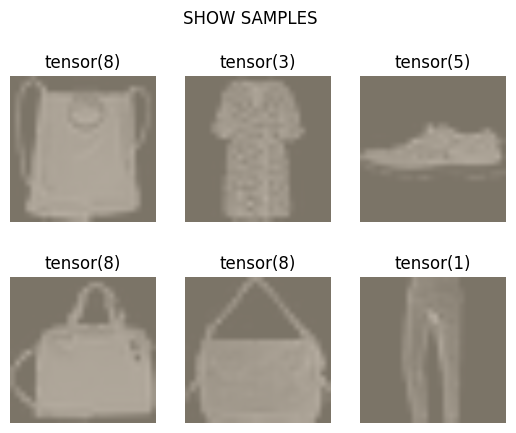

In [35]:
images, labels = next(iter(trainloader))
show_samples(images[0:6], labels[0:6], 2, 3, 'SHOW SAMPLES', normalize=True)